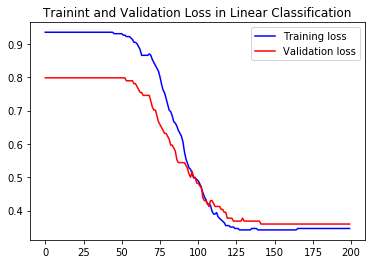

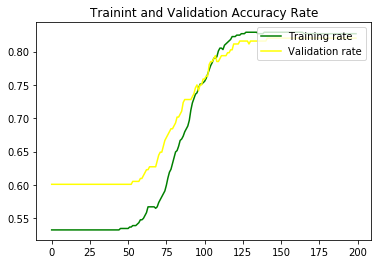

In [2]:
# write your code herefrom sklearn.datasets import load_svmlight_file
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# 计算hinge loss的梯度
def hinge_loss_grad(X, y, w):
    row, col = X.shape
    grad=np.zeros((row,col))
    b = y * (X.dot(w).reshape(row,1))<1
    b = b.ravel()
    grad[b,:] = - X[b,:] * y[b,:]
    grad_average = np.mean(grad, axis=0)
    return grad_average.reshape(col,1)

# # 计算Loss
# def Loss(X, y, w):
#     row, col = X.shape
#     loss_mat = np.zeros((row,1))
#     b = y * (X.dot(w))<1
#     b = b.ravel()
#     loss_mat[b,:] = 1-y[b,:] * (X[b,:].dot(w))
#     return loss_mat.mean()

# 计算Loss
def Loss(y_real, y_prediction, w):
    row, col = y_real.shape
    loss_mat = np.zeros((row,1))
    b = y_real * y_prediction <1
    b = b.ravel()
    loss_mat[b,:] = 1-y_real[b,:] * y_prediction[b,:]
    return loss_mat.mean()

# 计算正确率
def rate(y_real, y_prediction):
    row, col = y_real.shape
    mat = np.zeros([row, 1])
    b = (y_real == y_prediction)
    b = b.ravel()
    mat[b,:] = 1
    return mat.sum()/row
    

# 用所得模型进行分类, theta为阈值
def classifier(X, w, theta):
    row, col = X.shape
    prediction_mat = np.ones((row, 1))
    b = X.dot(w) < theta
    b = b.ravel()
    prediction_mat[b,:] = -1
    return prediction_mat


# 加载数据并分离测试集和验证集
X, y = load_svmlight_file('australian_scale.txt')
row, col = X.shape
X = X.toarray()
y = y.reshape(row, 1)
X = np.column_stack((X, np.ones((row, 1))))
X_train, X_validation, y_train, y_validation = train_test_split(X, y , test_size=0.33, random_state=42 )

# 初始化数据, T是训练轮数, alpha是学习率, theta是阈值, C为hinge loss的常数
row, col = X_train.shape
w = np.zeros((col, 1))
T = 200
alpha = 0.01
theta = 0.5
C = 1

# 训练集和测试集LOSS
train_loss = np.zeros(T)
validation_loss = np.zeros(T)
train_rate = np.zeros(T)
validation_rate = np.zeros(T)
# 梯度下降
for turns in range(T):
    grad = w + C * hinge_loss_grad(X_train, y_train, w)
    w = w - alpha * grad
    prediction_train = classifier(X_train, w, theta)
    train_loss[turns] = Loss(y_train, prediction_train,w)
    train_rate[turns] = rate(y_train, prediction_train)
    #print(rate(y_train,prediction_train))
   # train_loss[turns] = Loss(X_train, y_train, w)
    prediction_validation = classifier(X_validation, w, theta)
    validation_loss[turns] = Loss(y_validation, prediction_validation, w)
    validation_rate[turns] = rate(y_validation, prediction_validation)
   # validation_loss[turns] = Loss(X_validation, y_validation, w)
        
# 绘图
plt.figure()
x_axis = range(T)
plt.title("Trainint and Validation Loss in Linear Classification")
plt.plot(x_axis, train_loss,color="blue",linestyle="-",label="Training loss")
plt.plot(x_axis, validation_loss,color="red",linestyle="-",label="Validation loss")
plt.legend(loc="upper right")
plt.show()

plt.figure()
plt.title("Trainint and Validation Accuracy Rate")
plt.plot(x_axis, train_rate,color="green",linestyle="-",label="Training rate")
plt.plot(x_axis, validation_rate,color="yellow",linestyle="-",label="Validation rate")
plt.legend(loc="upper right")
plt.show()